# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [1]:
# Importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Getting the data
df = pd.read_csv('orders.csv')
df.head()

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


## Understanding our Data

In [5]:
df.shape

(5000, 7)

In [6]:
df["order_value"].isna().sum()

0

In [8]:
df["order_value"].mean() # This is the AOV we got

3145.128

In [10]:
df["order_value"].max()

704000

In [11]:
df["total_items"].max()

2000

Text(0, 0.5, 'Total Price of All Shoes')

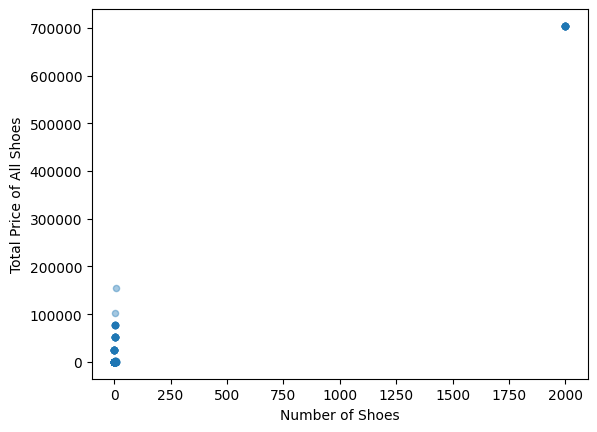

In [18]:
df.plot.scatter(x="total_items", y="order_value", alpha=0.4)
plt.xlabel("Number of Shoes")
plt.ylabel("Total Price of All Shoes")

##### As you can tell, there's multiple outliers that's skewed the AOV data

In [20]:
new_df = df[df["total_items"] < 100]
new_df.shape

(4983, 7)

Text(0, 0.5, 'Total Price of All Shoes')

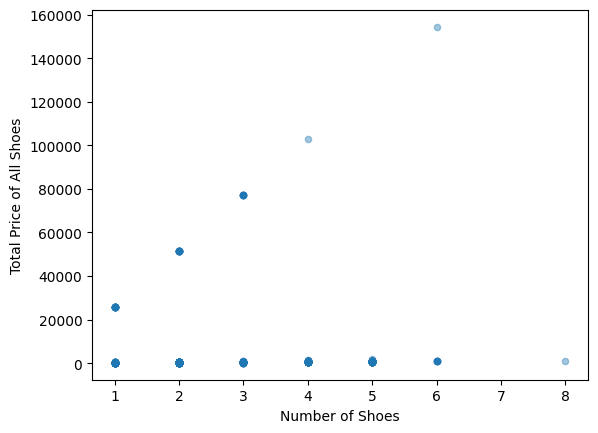

In [22]:
new_df.plot.scatter(x="total_items", y="order_value", alpha=0.4)
plt.xlabel("Number of Shoes")
plt.ylabel("Total Price of All Shoes")

##### This graph is much better and shows a more "reasonable" spread.

In [61]:
new_AOV = new_df["order_value"].mean()
new_AOV

754.0919125025085

##### This is a much more reasonable AOV and more accurate of what would actually happen!


##### However, the AOV metric is inaccurate for multiple reasons:
1. It fails to account in different shoe pricings and thus both inexpensive and expensive shoes are treated in the same group
2. It's an inaccurate metric overall since different consumers have different incomes and preferences

##### A better method of determining consumer trends and behavior is by looking at methods of payment and time of purchases

In [64]:
df["payment_method"].unique()

array(['cash', 'credit_card', 'debit'], dtype=object)

730.353199498118

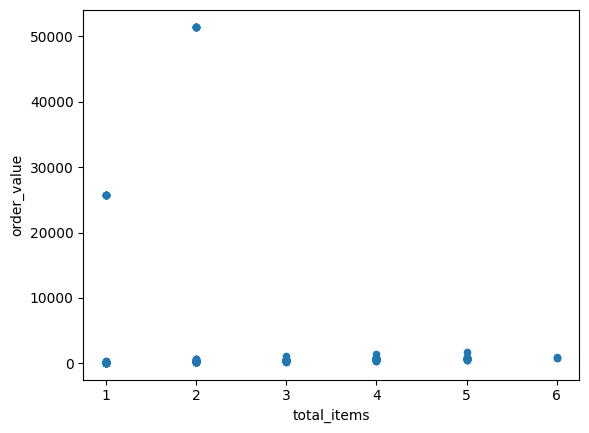

In [68]:
cash = df[df["payment_method"] == "cash"]
cash.plot.scatter(x="total_items", y="order_value")
cash["order_value"].mean()

7461.594812680115

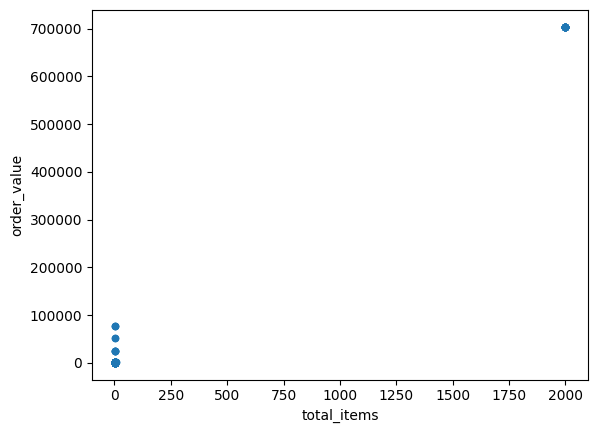

In [69]:
credit = df[df["payment_method"] == "credit_card"]
credit.plot.scatter(x="total_items", y="order_value")
credit["order_value"].mean()

966.8402154398564

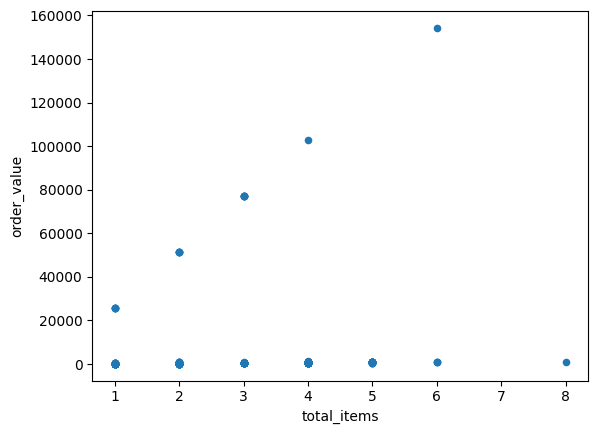

In [70]:
debit = df[df["payment_method"] == "debit"]
debit.plot.scatter(x="total_items", y="order_value")
debit["order_value"].mean()

##### As you can see, both debit and cash are very similar to each other at around 750 to 1000 dollars of AOV. However, consumers that use credit cards have an AOV of $7461, which is extremely high. This may be due to how confident consumers are in their buying power as well as how credit cards work in comparison to debit cards and cash.

In [82]:
# Create a day function to see what days are the most popular
def getDay(str):
    str = str.split()[0]
    print(str)
    YC = (17 + 17//4) % 7
    MC = 3
    Date = int(str[-2:])
    day = (YC + MC + Date + 6) % 7
    values = {0: "Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}
    return values[day]

In [83]:
df["order_value"].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_value, dtype: float64